# Actividad - Ecuaciones diferenciales

In [1]:
from scipy.integrate import solve_ivp, odeint

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [9]:
import numpy as np


def fun(t, x):
    return x/(t+1)

x0 = np.array([2])
t_span= [0, 10]
sol = solve_ivp(fun, t_span, x0, max_step =0.01) #maxstep marca los pasos que tomara de dato en dato
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 6008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.01,  0.02, ...,  9.99, 10.  , 10.  ])
 t_events: None
        y: array([[ 2.  ,  2.02,  2.04, ..., 21.98, 22.  , 22.  ]])
 y_events: None

Grafique con condición inicial $x_0 = 2$

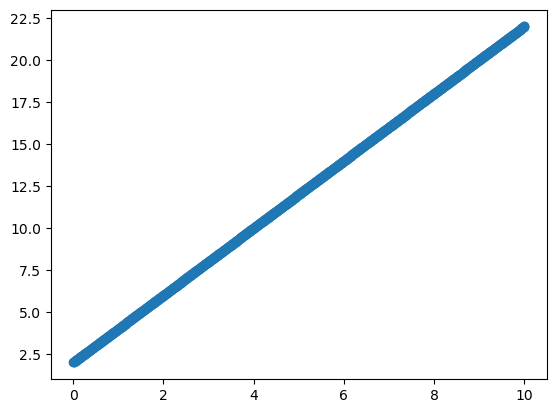

In [11]:
plt.figure()
plt.scatter(sol.t, sol.y[0])

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [73]:
w0 = 3

def funcion_que_regresa_derivadas_de_lo_que_entra(t, X):
    x = X[0]
    dx = X[1]
    return np.array([dx, -w0**2*x])

In [74]:
from scipy.integrate import solve_ivp
tspan = [0, 10]
X0 = [0.5,0.1]
sol_pend = solve_ivp(funcion_que_regresa_derivadas_de_lo_que_entra, tspan, X0, max_step = 0.1)
sol_pend

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 608
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.03155236,  0.13155236,  0.23155236,  0.33155236,
        0.43155236,  0.53155236,  0.63155236,  0.73155236,  0.83155236,
        0.93155236,  1.03155236,  1.13155236,  1.23155236,  1.33155236,
        1.43155236,  1.53155236,  1.63155236,  1.73155236,  1.83155236,
        1.93155236,  2.03155236,  2.13155236,  2.23155236,  2.33155236,
        2.43155236,  2.53155236,  2.63155236,  2.73155236,  2.83155236,
        2.93155236,  3.03155236,  3.13155236,  3.23155236,  3.33155236,
        3.43155236,  3.53155236,  3.63155236,  3.73155236,  3.83155236,
        3.93155236,  4.03155236,  4.13155236,  4.23155236,  4.33155236,
        4.43155236,  4.53155236,  4.63155236,  4.73155236,  4.83155236,
        4.93155236,  5.03155236,  5.13155236,  5.23155236,  5.33155236,
        5.43155236,  5.531552

Grafique

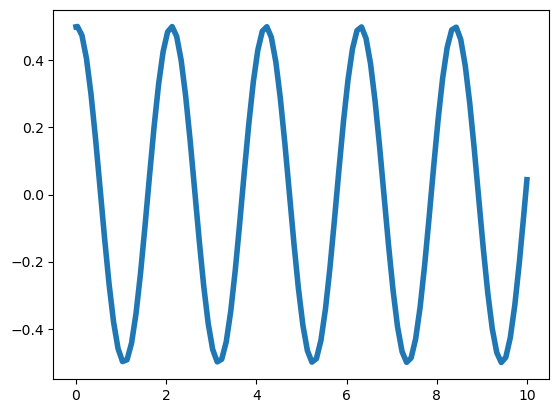

In [75]:
plt.figure()
plt.plot(sol_pend.t, sol_pend.y[0, :], lw=4)

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [77]:
th0 = 0.5
v0 = 0.1
w0 = 3

def posicion(t, w0, th0, v0):
    A = th0
    B = v0/w0
    return (A*np.cos(w0*t) + B*np.sin(w0*t))

def velocidad(t):
    A = th0
    B = v0/w0
    returnw0*(-A*np.sin(w0*t) + B*np.cos(w0))

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [82]:
def funcion(t, w0, th0,v0) :
    # a y b = intervalo de tiempo
    t = np.linspace(0, t, 10000)
    plt.plot(sol_pend.t,sol_pend.y[0,:],lw=4, label = "Solución Númerica")
    plt.plot(t,posicion(t, w0, th0, v0),"r", label = "Solución Analitica")
    plt.legend()

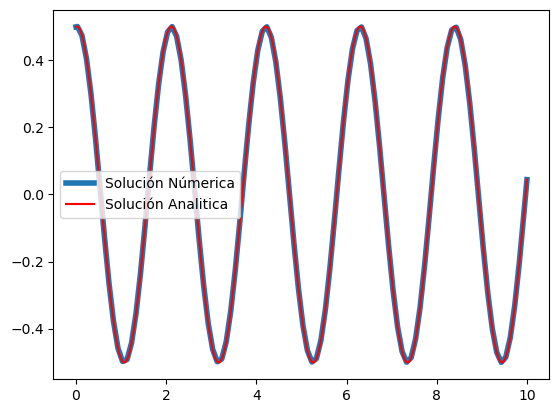

In [83]:
funcion(10, 3, 0.5, 0.1)